In [32]:
from pathlib import Path
import csv
from datetime import datetime
import matplotlib.pyplot as plt

file_name='sitka_weather_2021_simple.csv'
path = Path(f'../data/weather_data/{file_name}')

lines = path.read_text().splitlines()
reader = csv.reader(lines)


## Extracting and reading data

Date - using the module datetime, we extract the dates using strptime(timestring, format). We will use strptime(datestring, '%Y-%m-%d')
as that is how date is formated in this csv file. 

In [33]:
header_row = next(reader)
print(header_row)
# See all column indexes using enumerate
for index, column_header in enumerate(header_row):
    print(index, column_header)
#Extraction all Tmax (Highs) - it starts from second line, as the first was already read on header_row
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)
print(highs)


['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']
0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN
[44, 44, 43, 45, 45, 44, 48, 48, 46, 46, 44, 44, 39, 47, 48, 47, 46, 48, 42, 38, 41, 40, 38, 39, 37, 36, 30, 36, 40, 42, 43, 38, 38, 40, 39, 37, 37, 36, 30, 17, 30, 37, 39, 38, 37, 35, 38, 43, 43, 42, 44, 44, 42, 38, 39, 42, 43, 44, 45, 41, 41, 41, 43, 43, 43, 47, 40, 41, 40, 41, 37, 35, 34, 40, 42, 43, 40, 37, 39, 43, 42, 42, 40, 41, 42, 39, 41, 41, 41, 41, 36, 38, 41, 41, 40, 38, 41, 39, 39, 36, 41, 41, 45, 45, 48, 50, 56, 67, 61, 51, 57, 52, 63, 60, 53, 50, 51, 48, 47, 48, 50, 49, 48, 55, 63, 56, 50, 49, 52, 49, 49, 47, 49, 48, 49, 52, 56, 57, 52, 53, 49, 53, 50, 51, 51, 51, 49, 57, 58, 58, 56, 53, 51, 56, 58, 54, 58, 59, 53, 55, 59, 61, 67, 64, 58, 60, 66, 58, 68, 59, 55, 56, 63, 63, 59, 63, 78, 75, 61, 62, 61, 60, 66, 60, 65, 59, 58, 58, 57, 60, 60, 60, 57, 58, 60, 61, 63, 63, 70, 64, 59, 63, 61, 58, 59, 64, 62, 70, 70, 73, 66, 66, 62, 67, 65, 69, 63, 65, 63, 60, 60, 61, 65, 64, 60, 58

## Ploting the data using myplotlib

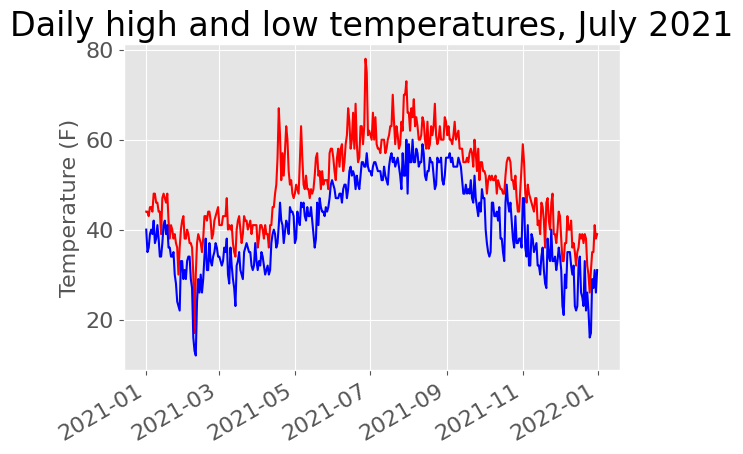

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

#Ploting both highs and lows
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

#Formatting plot
ax.set_title('Daily high and low temperatures, July 2021', fontsize=24)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)
fig.autofmt_xdate()

plt.show()